In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import os
import tools

In [2]:
data = pd.read_csv('data.csv')

In [3]:
stats = pd.read_csv('stats.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'filename', 'name', 'hand', 'board', 'board texture flop',
       'board texture turn', 'pf stack(bb)', '#pl pf', 'position pf',
       'position pf/#pl pf', 'pf bets(bb)', 'pf agg', 'stack/pfpot',
       'hand strength pf', 'fl stack(bb)', '#pl fl', 'position fl',
       'position fl/#pl fl', 'fl bets(bb)', 'fl bets/pot', 'fl agg',
       'stack/flpot', 'hand strength fl', 'eff hand strength fl', 'bluff flop',
       'total bets flop', 'tr stack(bb)', '#pl tr', 'position tr',
       'position tr/#pl tr', 'tr bets(bb)', 'tr bets/pot', 'tr agg',
       'stack/trpot', 'hand strength tr', 'eff hand strength tr', 'bluff turn',
       'total bets turn', 'rv stack(bb)', '#pl rv', 'position rv',
       'position rv/#pl rv', 'rv bets(bb)', 'rv bets/pot', 'rv agg',
       'stack/rvpot', 'hand strength rv', 'bluff river', 'tot bets', 'tot agg',
       'bets/stacks', 'street reached'],
      dtype='object')

In [5]:
stats.columns

Index(['Unnamed: 0', 'avgstack', 'net', 'foldpf', 'callpf', 'raisepf',
       'foldtoraisepf', 'numraisedpf', 'reraisepf', 'foldtoreraisepf',
       'numreraisedpf', 'numplayedpf', 'pctseenfl', 'foldfl', 'callfl',
       'betfl', 'raisefl', 'foldtoraisefl', 'numraisedfl', 'reraisefl',
       'foldtoreraisefl', 'numreraisedfl', 'numplayedfl', 'pctseentr',
       'foldtr', 'calltr', 'bettr', 'raisetr', 'foldtoraisetr', 'numraisedtr',
       'reraisetr', 'foldtoreraisetr', 'numreraisedtr', 'numplayedtr',
       'pctseenrv', 'foldrv', 'callrv', 'betrv', 'raiserv', 'foldtoraiserv',
       'numraisedrv', 'reraiserv', 'foldtoreraiserv', 'numreraisedrv',
       'numplayedrv', 'pctseensd', 'numplayedsd', 'winpercent', 'bb/100hands'],
      dtype='object')

In [6]:
tools.startinghandsequity(['As','Ad'], ['Ks','Kh'])

0.81714695692062378

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
pd.set_option('display.max_columns', None)
print(df.head())

In [ ]:
z[(z[0]<=1) & (z[0]>.90)]['diff'].plot.hist()
#z['diff'].plot.hist()

In [ ]:
z[0].plot.hist(bins = 20)

In [ ]:
print(max(z[0]))

In [ ]:
z['test actual'].plot.hist(bins = 20)

In [ ]:
X = z[(z[0]<=1) & (z[0]>.85)]['diff']


dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(X)
    pdf_fitted = dist.pdf(np.linspace(0,1,len(X)), *param[:-2], loc=param[-2], scale=param[-1]) * max(X) 

    plt.plot(np.linspace(0,1,len(X)), pdf_fitted, label=dist_name)

#param = rayleigh.fit(z['test actual'])
plt.legend(loc='upper right')
plt.show()



In [ ]:
print(np.linspace(0,1,len(z['test actual'])))

In [ ]:
print(pdf_fitted)

In [ ]:
X = z['test actual']

h = plt.hist(X, bins = 20,color='blue')
dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

param = scipy.stats.gamma.fit(X)
print(param)
pdf_fitted = scipy.stats.gamma.pdf(np.linspace(0,1,len(X)), loc=param[-2], scale=param[-1]) * 1000
plt.plot(np.linspace(0,1,len(X)),pdf_fitted, label=dist_name)

In [ ]:
h = plt.hist(pdf_fitted, bins = 20,color='blue')

In [ ]:
from scipy.stats import gamma

In [ ]:
fig, ax = plt.subplots(1,1)
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6)

In [ ]:
rv = gamma(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = gamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a))

r = gamma.rvs(a, size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
pred = .8

X = z[(z[0]<=pred + .05) & (z[0]>pred - .05)]['diff']

fit_alpha, fit_loc, fit_beta=gamma.fit(X)
print(fit_alpha, fit_loc, fit_beta)
# (5.0833692504230008, 100.08697963283467, 21.739518937816108)

#print(alpha, loc, beta)

In [ ]:
d = gamma.rvs(fit_alpha, loc=fit_loc, scale=fit_beta, size=700)

h = plt.hist(X, bins = 10,color='blue')

In [ ]:
h = plt.hist(d, bins = 10,color='blue')

In [ ]:
plt.hist(df['hand strength pf'] ** 2, bins = 20, color ='blue')

In [ ]:
plt.hist(df['hand strength rv'] ** 2, bins = 20, color ='blue')

In [ ]:
gamma.pdf(0,fit_alpha, loc=fit_loc, scale=fit_beta)

In [ ]:
pfequity = pd.read_csv('./tables/totalequity.csv')#adjust pfequity from 0-1
pfequity = pfequity.drop('Unnamed: 0', axis = 1)
pfequity['1'] = pfequity['1'] - pfequity['1'].min()
pfequity['1'] = pfequity['1']/pfequity['1'].max()
pfequity = pfequity.set_index(['0'])

allpfequity = pd.read_csv('./tables/allequity.csv')
allpfequity = allpfequity.set_index('0')

In [ ]:
print(pfequity)

In [9]:
import itertools
import tools
import deck as dk

          num
72o  0.000000
82o  0.005952
62o  0.011905
32o  0.017857
83o  0.023810
92o  0.029762
42o  0.035714
73o  0.041667
52o  0.047619
93o  0.053571
T2o  0.059524
94o  0.065476
63o  0.071429
T3o  0.077381
84o  0.083333
43o  0.089286
T4o  0.095238
74o  0.101190
J2o  0.107143
53o  0.113095
T5o  0.119048
95o  0.125000
J3o  0.130952
64o  0.136905
72s  0.142857
85o  0.148810
J4o  0.154762
75o  0.160714
54o  0.166667
82s  0.172619
..        ...
KJo  0.827381
A7s  0.833333
A9o  0.839286
KTs  0.845238
22   0.851190
A8s  0.857143
KQo  0.863095
KJs  0.869048
33   0.875000
A9s  0.880952
ATo  0.886905
44   0.892857
KQs  0.898810
55   0.904762
ATs  0.910714
AJo  0.916667
66   0.922619
AJs  0.928571
77   0.934524
AQo  0.940476
88   0.946429
AQs  0.952381
AKo  0.958333
99   0.964286
AKs  0.970238
TT   0.976190
JJ   0.982143
QQ   0.988095
KK   0.994048
AA   1.000000

[169 rows x 1 columns]


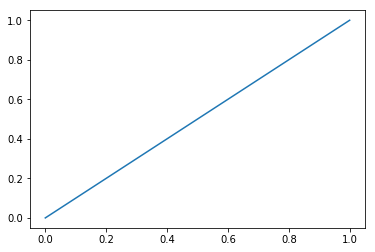

In [133]:
from collections import Counter
startingsimplehands = []
for hand in data['hand']:  
    startingsimplehands.append(tools.simplehand([hand[2:4],hand[8:10]]))
            
startingsimplehands = Counter(startingsimplehands)
startingsimplehands = dict(startingsimplehands)
startingsimplehands = pd.Series(startingsimplehands)
startingsimplehands = startingsimplehands.astype(float)
for i in range(len(startingsimplehands.index)):
    if startingsimplehands.index[i][-1] == 'o':
        startingsimplehands[i] = startingsimplehands[i]/12.0
    elif startingsimplehands.index[i][-1] == 's':
        startingsimplehands[i] = startingsimplehands[i]/4.0
    else:
        startingsimplehands[i] = startingsimplehands[i]/6.0
for i in range(len(startingsimplehands.index)):
    startingsimplehands[i] = startingsimplehands[i]/max(startingsimplehands)

allequity = pd.read_csv('./tables/allequity.csv')
allequity = allequity.set_index(['0'])

for handc in allequity.columns:
    for handr in allequity.index:
        allequity.at[handr, handc] = allequity.at[handr, handc] * startingsimplehands[handr]
        if handr[-1] == 'o':
            allequity.at[handr, handc] = allequity.at[handr, handc] * 12
        if handr[-1] == 's':
            allequity.at[handr, handc] = allequity.at[handr, handc] * 4
        else:
            allequity.at[handr, handc] = allequity.at[handr, handc] * 6
n = allequity.sum()# - min(allequity.sum())
n = n/max(n)
n = n.sort_values()

n.to_csv('adjpfrank.csv')
n = pd.DataFrame(n.sort_values())
n['num'] = np.arange(len(n[0]))
n['num'] = n['num']/max(n['num'])
n = n.drop(0, axis = 1)
print(n)
n.to_csv('linearrank.csv')
plt.plot(n['num'], n['num']/max(n['num']))

    

In [11]:
def handprobability():
    startinghands = []
    d = dk.Deck()
    startinghands += itertools.combinations(d.deck, 2)
    startinghands = [str(h[0]) + str(h[1]) for h in startinghands]
    startinghands = pd.DataFrame(startinghands)
    startinghands['rank'] = [[h[0:2],h[2:4]] for h in startinghands[0]]
    startinghands['rank'] = [tools.startinghandsrank(h) for h in startinghands['rank']]
    startinghands = startinghands.set_index(0)
    startinghands = startinghands.sort_values('rank', ascending = False)
    startinghands['num'] = np.arange(len(startinghands['rank']))
    plt.plot(startinghands['num'], startinghands['rank'])
    return startinghands

In [148]:
print(n.at['KK','num'])

0.994047619048


In [ ]:
for i in range(len(data['hand strength pf'])):
    data.at[i, 'hand strength pf'] = n.at[tools.simplehand([data['hand'][i][2:4],data['hand'][i][8:10]]),'num']


In [ ]:
data['hand strength pf']

          rank   num
0                   
AsAd  1.000000     0
AsAh  1.000000     1
AsAc  1.000000     2
AdAc  1.000000     3
AhAd  1.000000     4
AhAc  1.000000     5
KsKc  0.949462     6
KdKc  0.949462     7
KsKh  0.949462     8
KhKc  0.949462     9
KsKd  0.949462    10
KhKd  0.949462    11
QdQc  0.904836    12
QsQh  0.904836    13
QhQd  0.904836    14
QhQc  0.904836    15
QsQc  0.904836    16
QsQd  0.904836    17
JsJc  0.860323    18
JsJd  0.860323    19
JsJh  0.860323    20
JhJd  0.860323    21
JhJc  0.860323    22
JdJc  0.860323    23
TsTd  0.815565    24
TsTh  0.815565    25
TsTc  0.815565    26
ThTd  0.815565    27
TdTc  0.815565    28
ThTc  0.815565    29
...        ...   ...
2d6c  0.033024  1296
6h2c  0.033024  1297
2s6h  0.033024  1298
2s6c  0.033024  1299
6h2d  0.033024  1300
2s6d  0.033024  1301
2h4d  0.015764  1302
2h4c  0.015764  1303
2d4c  0.015764  1304
4h2d  0.015764  1305
4s2h  0.015764  1306
2s4d  0.015764  1307
4s2d  0.015764  1308
4h2c  0.015764  1309
4s2c  0.01576

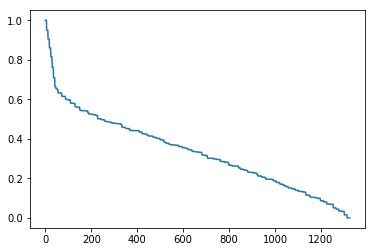

In [83]:
k = handprobability()
print(k)


In [ ]:
pfequity = pfequity.sort_values('1', ascending = False)

In [ ]:
pfequity['rank'] = np.arange(len(pfequity['1']))

In [ ]:
pfequity

In [ ]:
plt.plot(pfequity['rank'], pfequity['1'])

In [ ]:
print(df.corr()['hand strength pf'].sort_values())